# COVID-19 detection from Lung CT Scans
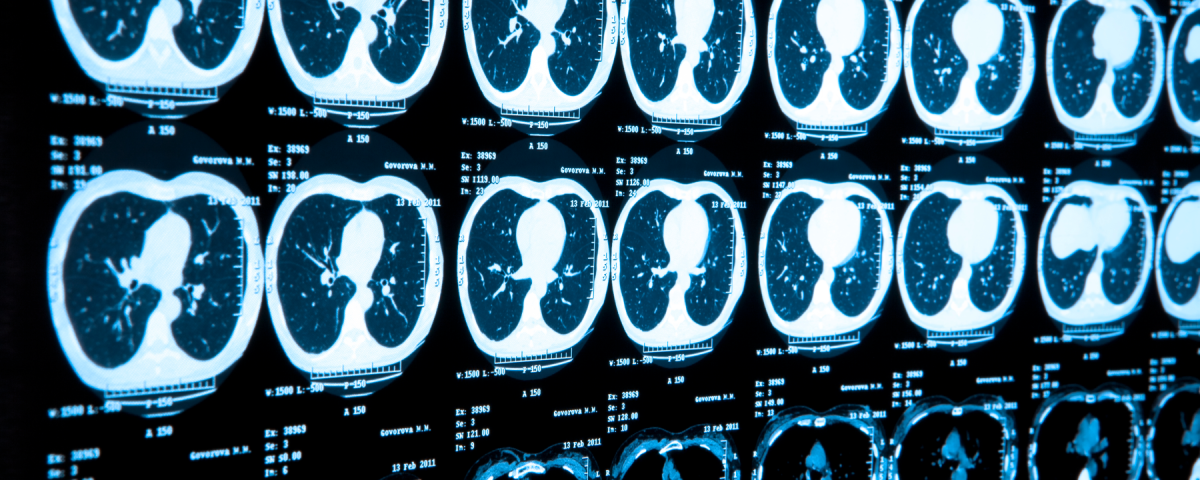

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os

import sklearn.metrics

# Reading the dataset

In [3]:
dire = 'C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/'
subdire_pos = os.path.join('C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/CT_COVID/')
subdire_neg = os.path.join('C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/CT_NonCOVID/')
print(f'Positive samples: {len(os.listdir(subdire_pos))}.')
print(f'Negative samples: {len(os.listdir(subdire_neg))}.')

Positive samples: 349.
Negative samples: 397.


## Path Creation

In [4]:

positive_images_ls = glob(os.path.join(subdire_pos,"*.png"))

negative_images_ls = glob(os.path.join(subdire_neg,"*.png"))
negative_images_ls.extend(glob(os.path.join(subdire_neg,"*.jpg")))

In [5]:
covid = {'class': 'CT_COVID',
         'path': subdire_pos,
         'images': positive_images_ls}

non_covid = {'class': 'CT_NonCOVID',
             'path': subdire_neg,
             'images': negative_images_ls}

# Total Number of +ve and -ve cases

In [6]:
total_positive_covid = len(positive_images_ls)
total_negative_covid = len(negative_images_ls)
print("Total +VE Cases images: {}".format(total_positive_covid))
print("Total -VE Cases Covid19 images: {}".format(total_negative_covid))

Total +VE Cases images: 349
Total -VE Cases Covid19 images: 397


# Sample of Positive Cases

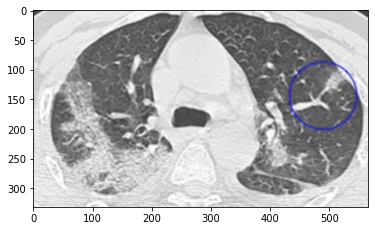

In [7]:
img_positive = cv2.imread(os.path.join(positive_images_ls[1]))
plt.imshow(img_positive)

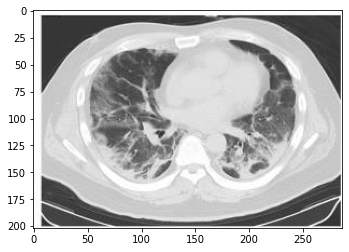

In [43]:
img_positive = cv2.imread(os.path.join(positive_images_ls[10]))
plt.imshow(img_positive)

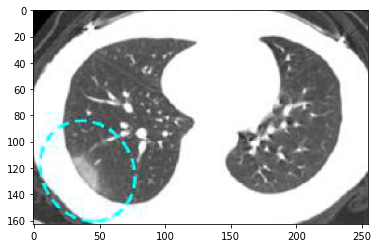

In [44]:
img_positive = cv2.imread(os.path.join(positive_images_ls[100]))
plt.imshow(img_positive)

# Sample of Negative Cases

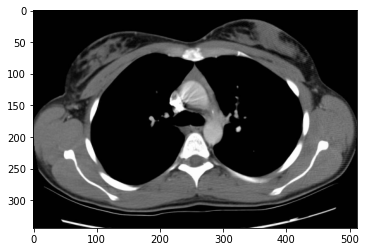

In [8]:
img_negative = cv2.imread(os.path.join(negative_images_ls[5]))
plt.imshow(img_negative)

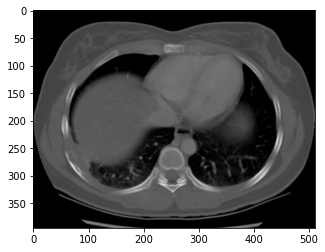

In [45]:
img_negative = cv2.imread(os.path.join(negative_images_ls[10]))
plt.imshow(img_negative)

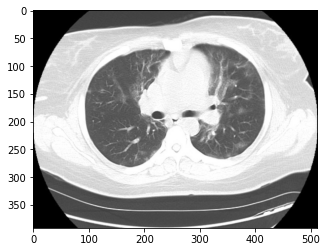

In [46]:
img_negative = cv2.imread(os.path.join(negative_images_ls[100]))
plt.imshow(img_negative)

### Checking the shape

In [9]:
print(img_positive.shape)
img_negative.shape

(332, 566, 3)


(344, 512, 3)

# Creating Train and Test folder in Dataset

In [10]:
subdirs  = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['CT_COVID', 'CT_NonCOVID']
    for labldir in labeldirs:
        newdir = subdir + labldir
        os.makedirs(newdir, exist_ok=True)

# Putting images in test folder

In [42]:

random.seed(123)
test_ratio = 0.1


for cases in [covid, non_covid]:
    total_cases = len(cases['images'])
    num_to_select = int(test_ratio * total_cases) 
    
      
    list_of_random_files = random.sample(cases['images'], num_to_select) 

    for files in list_of_random_files:
        shutil.copy2(files, 'test/' + cases['class'])

# Putting images in train folder

In [12]:
# Copy Images to train set
for cases in [covid, non_covid]:
    image_test_files = os.listdir('test/' + cases['class']) 
    for images in cases['images']:
        if images.split('/')[-1] not in (image_test_files): 
            shutil.copy2(images, 'train/' + cases['class'])

# Final Train Test Split

In [13]:
total_train_covid = len(os.listdir('C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/train/CT_COVID'))
total_train_noncovid = len(os.listdir('C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/train/CT_COVID'))
total_test_covid = len(os.listdir('C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/test/CT_COVID'))
total_test_noncovid = len(os.listdir('C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/test/CT_COVID'))

print("Number of COVID train sets images : {}".format(total_train_covid))
print("Number of NON COVID train sets images : {}".format(total_train_noncovid))
print("Number of COVID test sets images : {}".format(total_test_covid))
print("Number of NON COVID test sets images : {}".format(total_test_noncovid))

Number of COVID train sets images : 349
Number of NON COVID train sets images : 349
Number of COVID test sets images : 34
Number of NON COVID test sets images : 34


In [15]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
test_image_generator = ImageDataGenerator(rescale=1./255) 

In [16]:
train_dir = os.path.join('C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/train')
test_dir = os.path.join('C:/Users/KIIT/Desktop/66 Days of Data/Day20/Covid Dataset/test')


total_train = total_train_covid + total_train_noncovid
total_test = total_test_covid + total_test_noncovid

In [17]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=64,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150,150),
                                                           class_mode='binary')

Found 746 images belonging to 2 classes.


In [18]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=64,
                                                              directory=test_dir,
                                                              target_size=(150, 150),
                                                              class_mode='binary')

Found 73 images belonging to 2 classes.


# Making a Deep CNN model 

In [19]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

# Model Summery

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

# using ADAM Optimizer

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train //  64,
    epochs=20,
    validation_data=test_data_gen,
    validation_steps=total_test //  64
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - ETA: 0s - loss: 0.7080 - accuracy: 0.4822WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022358140EA0> and will run it as-is.
Please report this to the TensorFlow team. When filing t

# Storing Accuracy, Val_accuracy, Loss, Val_loss 

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

# Plotting graph between Accuracy and Val_Accuracy

In [39]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=acc, name='Accuracy',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=val_acc, name = 'Val_Accuracy',
                         line=dict(color='firebrick', width=3)))


# Plotting graph between Loss and Val_loss

In [41]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=loss, name='Loss',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=val_loss, name = 'Val_Loss',
                         line=dict(color='firebrick', width=3)))


# Prediction for Test Dataset

In [35]:
import sklearn.metrics
y_pred = (model.predict_generator(test_data_gen) > 0.5).astype(int)
y_true = test_data_gen.classes


# Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[16 18]
 [16 23]]


<AxesSubplot:>

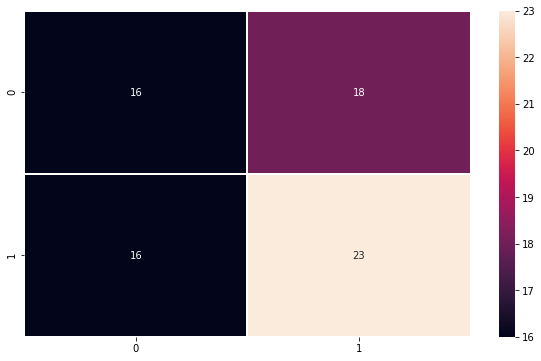

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
sns.heatmap(cm,annot = True, linewidth = 1)

In [38]:
print("Loss : ",model.evaluate_generator(test_data_gen)[0])
print("Accuracy : ",model.evaluate_generator(test_data_gen)[1])
print("F1 score:", sklearn.metrics.f1_score(y_true, y_pred))

Loss :  0.1673033982515335
Accuracy :  0.9178082346916199
F1 score: 0.575


# This Model can Successfully Predict Whether Someone got COVID-19 or not by Lung CT Scans with an Accuracy of 91.7%

#                                                 Stay Safe